In [4]:
import toml
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

sns.set_theme()

In [5]:
df = pd.read_csv("../addr-reachability.csv", names=["peer_id", "is_dialable", "multi_address"])

In [6]:
def extract_transport(maddr:str):
    if "/tcp/" in maddr:
        return "tcp"
    elif "/quic-v1" in maddr:
        return "quic-v1"
    elif "/quic" in maddr:
        return "quic"
    elif "/ws" in maddr:
        return "ws"
    else:
        return "unknown"

df["transport"] = df.apply(lambda r: extract_transport(r["multi_address"]), axis=1)
df

,peer_id,is_dialable,multi_address,transport
0,QmbLHAnMoJPWSCR5Zhtx6BHJX9KiKNN6tpvbUcqanj75Nb,True,/dnsaddr/bootstrap.libp2p.io,unknown
1,12D3KooWFQWQ4cxdPApZnoQm5pfGewmdHGHfqACF4x7qke...,True,/ip4/139.144.178.238/udp/4001/quic,quic
2,12D3KooWPDbLswv34D1HCfirEqMnctkfjeW9ej5bxFdbN3...,True,/ip4/193.223.242.207/udp/4001/quic,quic
3,12D3KooWLEda1BSaJ4pXCvr2tU6xDD8uVAZhuuaCS4ZmUz...,True,/ip4/139.144.72.174/udp/4001/quic,quic
4,QmQCU2EcMqAqQPR2i9bChDtGNJchTbq5TbXJJ16u19uLTa,True,/dnsaddr/bootstrap.libp2p.io,unknown
...,...,...,...,...
53460,12D3KooWE43v1UtbwXoaXrFYxxERWnMWEQQihwqZkMo4dz...,False,/ip4/45.115.59.157/tcp/12923,tcp
53461,12D3KooWE43v1UtbwXoaXrFYxxERWnMWEQQihwqZkMo4dz...,False,/ip4/45.115.59.157/tcp/14094,tcp
53462,12D3KooWE43v1UtbwXoaXrFYxxERWnMWEQQihwqZkMo4dz...,False,/ip4/131.153.79.210/tcp/24592,tcp
53463,12D3KooWE43v1UtbwXoaXrFYxxERWnMWEQQihwqZkMo4dz...,False,/ip4/45.115.59.157/tcp/14618,tcp


In [7]:
def extract_ip(maddr:str):
    if "/ip4/" in maddr:
        return 4
    elif "/ip6/" in maddr:
        return 6
    else:
        return "unknown"

df["ip"] = df.apply(lambda r: extract_ip(r["multi_address"]), axis=1)

In [8]:
df = df.sort_values(by="peer_id").reset_index().drop("index", axis=1)

In [9]:
df

,peer_id,is_dialable,multi_address,transport,ip
0,12D3KooW9pPpzmc2ihH9eqFUjGjoRATLsV9F5tuFK3Ypy6...,True,/ip4/45.76.169.230/udp/4001/quic,quic,4
1,12D3KooW9pPpzmc2ihH9eqFUjGjoRATLsV9F5tuFK3Ypy6...,True,/ip4/45.76.169.230/tcp/4001,tcp,4
2,12D3KooW9pSQFHsppRPC8AsJ4vGm9mqeQw8kGyMH8HYYhG...,True,/ip4/35.77.59.117/udp/4001/quic,quic,4
3,12D3KooW9pT3y2X3foVp6GHLrP2aceh4voM1kKNfVqmQnD...,True,/ip4/194.163.163.114/udp/4001/quic,quic,4
4,12D3KooW9pXJfCc9tiSi7CCY84Cad5Q3eyJ6LSB8caym5M...,True,/ip4/159.223.124.147/tcp/4001,tcp,4
...,...,...,...,...,...
53460,QmfYhgx5uqDC9FxLhhHK5wSK2sZtxe3bNJ84K4L7gWjFVV,True,/ip4/52.28.254.253/tcp/4001,tcp,4
53461,QmfYonSkDQ23ZNoyQ8YsWoYLw9xmh1NA9oSFcko7SZeHi9,True,/ip4/54.169.163.212/tcp/4001,tcp,4
53462,QmfYonSkDQ23ZNoyQ8YsWoYLw9xmh1NA9oSFcko7SZeHi9,True,/ip4/54.169.163.212/udp/4001/quic,quic,4
53463,QmfZAcrURvHXjejdEuxHGKTwiiYrUgjME589G4xPHPLQho,False,/ip4/183.16.239.248/tcp/60349,tcp,4


In [10]:
df["peer_id"].nunique()

25665

In [11]:
dialable_peers = set({})
undialable_addrs = {}
for idx, row in df.iterrows():
    peer_id = row["peer_id"]
    is_dialable = row["is_dialable"]
    if is_dialable:
        dialable_peers.add(peer_id)
    else:
        if peer_id in undialable_addrs:
            undialable_addrs[peer_id] += 1
        else:
            undialable_addrs[peer_id] = 1



In [12]:
transport = {}
ip = {}
for idx, row in df.iterrows():
    peer_id = row["peer_id"]
    is_dialable = row["is_dialable"]

    if is_dialable:
        continue

    if peer_id not in dialable_peers:
        continue

    if undialable_addrs[peer_id] != 1:
        continue

    transport[peer_id] = row["transport"]
    ip[peer_id] = row["ip"]




[Text(0, 0, '754'), Text(0, 0, '811'), Text(0, 0, '3')]

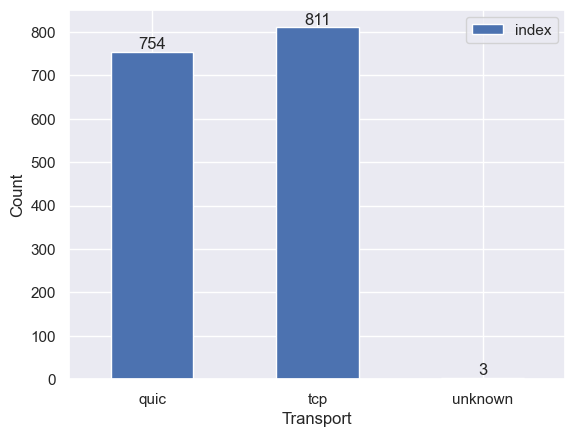

In [29]:
ax = pd.DataFrame.from_dict(transport, orient="index").reset_index().groupby(0).count().plot.bar(xlabel="Transport", ylabel="Count", rot=0)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1303'), Text(0, 0, '261'), Text(0, 0, '4')]

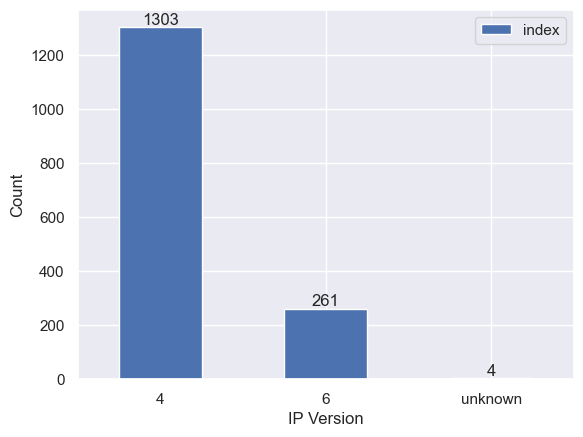

In [30]:
ax = pd.DataFrame.from_dict(ip, orient="index").reset_index().groupby(0).count().plot.bar(xlabel="IP Version", ylabel="Count", rot=0)

ax.bar_label(ax.containers[0])